In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import linear_model as lm
import sklearn

# Merging the data for hazards and pollutants

In [2]:
hazards_pivot = pd.read_csv('hazards_pivot3.csv')
emiss_pivot = pd.read_csv('pivot_emiss.csv')

In [3]:
hazards_pivot = hazards_pivot.drop('Unnamed: 0', axis=1)

In [4]:
hazards_pivot.columns = ['Year', 'Country', 'drought', 'flood', 'wildfire', 'wind']
hazards_pivot

,Year,Country,drought,flood,wildfire,wind
0,2001,Australia,-1.555795,0.925584,900401.427700,76.026778
1,2001,Austria,-0.755447,0.000000,98.222970,0.158769
2,2001,Belgium,7.240894,27.533538,0.000000,0.000000
3,2001,Canada,-7.562793,2.357571,3747.804100,6.519816
4,2001,Chile,1.540592,0.590901,92.685563,43.180798
...,...,...,...,...,...,...
856,2021,Sweden,0.877523,0.000000,0.000000,1.052787
857,2021,Switzerland,-0.363752,0.000000,0.000000,3.824921
858,2021,Türkiye,-11.477764,0.000000,5691.277641,3.992672
859,2021,United Kingdom,1.614077,0.000000,0.000000,48.376413


In [5]:
#setting the columns of the new dataset
new_columns = ['Carbon Monoxide Agriculture',
 'Carbon Monoxide Combustion',
 'Carbon Monoxide Industrial combustion',
 'Carbon Monoxide Industrial processes and product use',
 'Carbon Monoxide Miscellaneous',
 'Carbon Monoxide Other Mobile Sources',
 'Carbon Monoxide Other combustion',
 'Carbon Monoxide Power stations',
 'Carbon Monoxide Road Transport',
 'Carbon Monoxide Total Mobile Sources',
 'Carbon Monoxide Total Stationary Sources',
 'Carbon Monoxide Total emissions per capita',
 'Carbon Monoxide Total emissions per unit of GDP, Kg per 1000 USD',
 'Carbon Monoxide Total emissions, Index 1990 = 100',
 'Carbon Monoxide Total emissions, Index 2000 = 100',
 'Carbon Monoxide Total man-made emissions',
 'Carbon Monoxide Waste',
 'Nitrogen Oxides Agriculture',
 'Nitrogen Oxides Combustion',
 'Nitrogen Oxides Industrial combustion',
 'Nitrogen Oxides Industrial processes and product use',
 'Nitrogen Oxides Miscellaneous',
 'Nitrogen Oxides Other Mobile Sources',
 'Nitrogen Oxides Other combustion',
 'Nitrogen Oxides Power stations',
 'Nitrogen Oxides Road Transport',
 'Nitrogen Oxides Total Mobile Sources',
 'Nitrogen Oxides Total Stationary Sources',
 'Nitrogen Oxides Total emissions per capita',
 'Nitrogen Oxides Total emissions per unit of GDP, Kg per 1000 USD',
 'Nitrogen Oxides Total emissions, Index 1990 = 100',
 'Nitrogen Oxides Total emissions, Index 2000 = 100',
 'Nitrogen Oxides Total man-made emissions',
 'Nitrogen Oxides Waste',
 'Non-methane Volatile Organic Compounds Agriculture',
 'Non-methane Volatile Organic Compounds Combustion',
 'Non-methane Volatile Organic Compounds Industrial combustion',
 'Non-methane Volatile Organic Compounds Industrial processes and product use',
 'Non-methane Volatile Organic Compounds Miscellaneous',
 'Non-methane Volatile Organic Compounds Other Mobile Sources',
 'Non-methane Volatile Organic Compounds Other combustion',
 'Non-methane Volatile Organic Compounds Power stations',
 'Non-methane Volatile Organic Compounds Road Transport',
 'Non-methane Volatile Organic Compounds Total Mobile Sources',
 'Non-methane Volatile Organic Compounds Total Stationary Sources',
 'Non-methane Volatile Organic Compounds Total emissions per capita',
 'Non-methane Volatile Organic Compounds Total emissions per unit of GDP, Kg per 1000 USD',
 'Non-methane Volatile Organic Compounds Total emissions, Index 1990 = 100',
 'Non-methane Volatile Organic Compounds Total emissions, Index 2000 = 100',
 'Non-methane Volatile Organic Compounds Total man-made emissions',
 'Non-methane Volatile Organic Compounds Waste',
 'Particulates (PM10) Agriculture',
 'Particulates (PM10) Combustion',
 'Particulates (PM10) Industrial combustion',
 'Particulates (PM10) Industrial processes and product use',
 'Particulates (PM10) Miscellaneous',
 'Particulates (PM10) Other Mobile Sources',
 'Particulates (PM10) Other combustion',
 'Particulates (PM10) Power stations',
 'Particulates (PM10) Road Transport',
 'Particulates (PM10) Total Mobile Sources',
 'Particulates (PM10) Total Stationary Sources',
 'Particulates (PM10) Total emissions per capita',
 'Particulates (PM10) Total emissions per unit of GDP, Kg per 1000 USD',
 'Particulates (PM10) Total emissions, Index 1990 = 100',
 'Particulates (PM10) Total emissions, Index 2000 = 100',
 'Particulates (PM10) Total man-made emissions',
 'Particulates (PM10) Waste',
 'Particulates (PM2.5) Agriculture',
 'Particulates (PM2.5) Combustion',
 'Particulates (PM2.5) Industrial combustion',
 'Particulates (PM2.5) Industrial processes and product use',
 'Particulates (PM2.5) Miscellaneous',
 'Particulates (PM2.5) Other Mobile Sources',
 'Particulates (PM2.5) Other combustion',
 'Particulates (PM2.5) Power stations',
 'Particulates (PM2.5) Road Transport',
 'Particulates (PM2.5) Total Mobile Sources',
 'Particulates (PM2.5) Total Stationary Sources',
 'Particulates (PM2.5) Total emissions per capita',
 'Particulates (PM2.5) Total emissions per unit of GDP, Kg per 1000 USD',
 'Particulates (PM2.5) Total emissions, Index 1990 = 100',
 'Particulates (PM2.5) Total emissions, Index 2000 = 100',
 'Particulates (PM2.5) Total man-made emissions',
 'Particulates (PM2.5) Waste',
 'Sulphur Oxides Agriculture',
 'Sulphur Oxides Combustion',
 'Sulphur Oxides Industrial combustion',
 'Sulphur Oxides Industrial processes and product use',
 'Sulphur Oxides Miscellaneous',
 'Sulphur Oxides Other Mobile Sources',
 'Sulphur Oxides Other combustion',
 'Sulphur Oxides Power stations',
 'Sulphur Oxides Road Transport',
 'Sulphur Oxides Total Mobile Sources',
 'Sulphur Oxides Total Stationary Sources',
 'Sulphur Oxides Total emission intensities',
 'Sulphur Oxides Total emissions per capita',
 'Sulphur Oxides Total emissions per unit of GDP, Kg per 1000 USD',
 'Sulphur Oxides Total emissions, Index 1990 = 100',
 'Sulphur Oxides Total emissions, Index 2000 = 100',
 'Sulphur Oxides Total man-made emissions',
 'Sulphur Oxides Waste']

In [6]:
emiss_pivot[new_columns] = emiss_pivot[new_columns].astype(float)
hazards_pivot[['drought', 'flood', 'wildfire', 'wind']] = hazards_pivot[['drought', 'flood', 'wildfire', 'wind']].astype(float)


In [7]:
#checking that the countries match in the two datasets
con1 = emiss_pivot['Country'].unique()
con2 = hazards_pivot['Country'].unique()
set(con1)==set(con2)

True

In [8]:
#merging the two datasets using Year and Country to ensure same data is in the same row
merged_result = pd.merge(emiss_pivot, hazards_pivot, on=['Year', 'Country'])
merged_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 781
Columns: 109 entries, Country to wind
dtypes: float64(107), int64(1), object(1)
memory usage: 672.0+ KB


In [9]:
#taking care of missing values and saving the dataset
merged_result = merged_result.fillna(0)
merged_result.to_csv('merged_haz_data.csv', index=False)

## Finding correlations in the data 

In [10]:
#function to create correlation matrix and find the most correlated columns
def correlations(data, n):
    correl_matrix = data.corr()
    corr_series = correl_matrix['wildfire'].nlargest(n)
    return correl_matrix, corr_series

In [11]:
correl_matrix, most_correlated = correlations(merged_result, 20)
correlated_col = most_correlated.index.tolist()

In [12]:
#creating the correlation heatmap
def corr_plot(data, columns):
    plt.figure(figsize=(16, 6))
    corr_mat = data[columns].corr()
    mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
    heatmap = sns.heatmap(corr_mat, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
    plt.show()


<ipython-input-12-9c5206f74a4e>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))


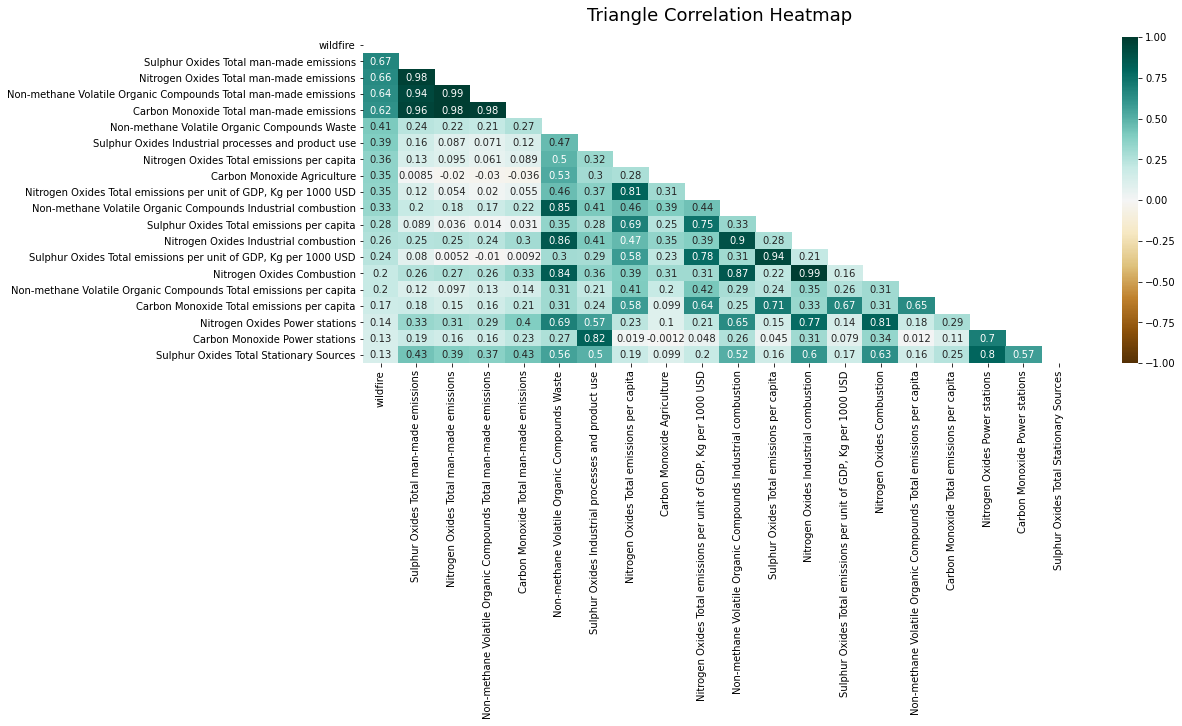

In [13]:
corr_plot(merged_result, correlated_col)

We used this correlation heatmap to find the pollutants and source of pollutants most responible for causing wildfires.

## Modelling

In [14]:
#splitting in training and test data
m1= merged_result['Year']<2020
m2 = merged_result['Year']==2020
train = merged_result.loc[m1]
test = merged_result.loc[m2]
train = train[correlated_col] #using only the most correlated columns
test = test[correlated_col]

In [15]:
#function for RMSE
def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array-like): vector of actual values
      predicted (1D array-like): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """ 
    rmse = np.sqrt(((actual-predicted)**2).mean())
    return rmse

In [16]:
#standardizing columns
def standardize_columns(data):
    '''
    Input:
      data (data frame): contains only numeric columns
    Output:
      data frame, the same data, except each column is standardized 
      to have 0-mean and unit variance
    '''
    
    standardized_data = (data-data.mean())/data.std()
    return standardized_data

In [17]:
#funciton to process the data
def process_data(data):
    X = data.drop(['wildfire'], axis = 1)
    y = data['wildfire']
    return X, y

### LASSO CV MODEL

In [18]:
# Process the data
X_train, y_train = process_data(train)
X_test, y_test = process_data(test)

# Specify the model, alphas, and number of folds for CV
alphas = np.arange(1, 20, .1)
guidedmodel2 = lm.LassoCV(alphas=alphas, cv=10, max_iter = 1000000 )

# Fit and predict
guidedmodel2.fit(X_train, y_train)
y_predicted = guidedmodel2.predict(X_test)

print(f'The validation RMSE for this model with '
      f'alpha={round(float(guidedmodel2.alpha_), 2)} is '
      f'{round(rmse(y_test, y_predicted), 2)}.')

The validation RMSE for this model with alpha=19.9 is 59242.73.


In [19]:
outcome = pd.DataFrame(y_predicted)
outcome.head(10)

,0
0,454908.070963
1,-2212.151860
2,3608.364119
3,-9970.522930
4,-5882.259568
5,1067.744903
6,-9106.446873
7,-3770.321662
8,-2022.944116
9,-7524.179686


In [20]:
test = pd.DataFrame(y_test)
test.shape
test.head(10)

,wildfire
19,222180.059600
39,1.457678
59,12.279766
79,2631.388173
139,7.232045
159,0.246323
179,1.666259
199,0.000000
219,85.881241
239,4.038905


sklearn.metrics.r2_score(y_test, y_predicted)

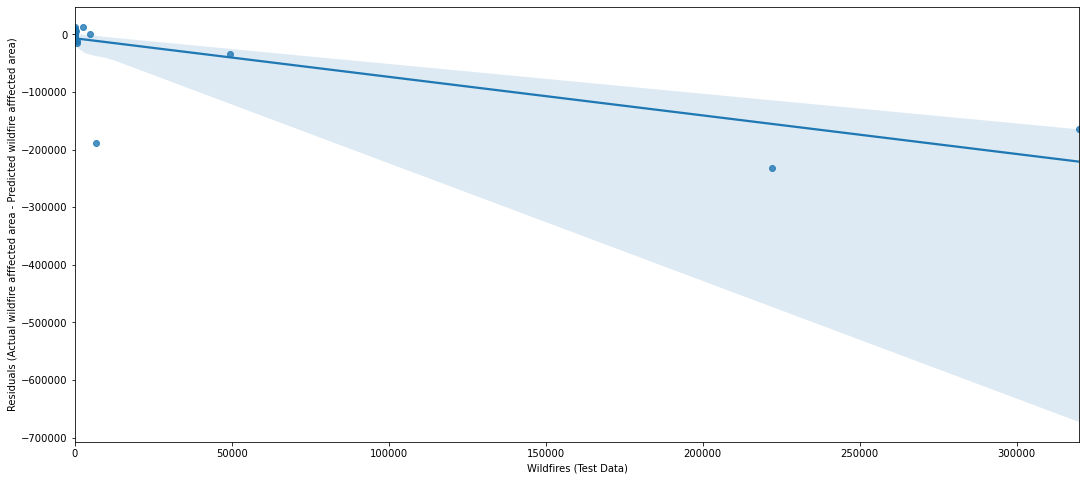

In [21]:
#plotting the result of the model 
gm1_residuals = y_test - y_predicted
plt.figure(figsize= (18,8))
ax = sns.regplot(x=y_test, y=gm1_residuals)

ax.set_xlabel('Wildfires (Test Data)')
ax.set_ylabel('Residuals (Actual wildfire afffected area - Predicted wildfire afffected area)');

### LINEAR REGRESSION MODEL

In [22]:
#trying a simple linear regression model
guidedmodel1 = lm.LinearRegression(fit_intercept=True)

# Fill in the ... below with X_train, y_train, X_train, or X_test.
# Remember to uncomment
guidedmodel1.fit(X_train, y_train)
y_fitted = guidedmodel1.predict(X_train)
y_predicted = guidedmodel1.predict(X_test)
rmse(y_test, y_predicted)

59230.515846660695

## INTERPRETATION
As the model is not very accurate, we have decided to not show the results in our video. This might be due to the fact, that it is a time series. Additionally, we do not have very closely correlated data. Furthermore the data set is rather small. 

# EDA of pollutants per country

In [23]:
final_data = pd.read_csv('emission_merged.csv')
final_data

,Country,Year,Pollutant,Variable,Value,Unit,PowerCode,DataType
0,Australia,2000,Carbon Monoxide,Total man-made emissions,5386.853,Tonnes,Thousands,emiss
1,Australia,2000,Carbon Monoxide,Total Mobile Sources,3705.567,Tonnes,Thousands,emiss
2,Australia,2000,Carbon Monoxide,Road Transport,3381.295,Tonnes,Thousands,emiss
3,Australia,2000,Carbon Monoxide,Other Mobile Sources,324.272,Tonnes,Thousands,emiss
4,Australia,2000,Carbon Monoxide,Total Stationary Sources,1681.285,Tonnes,Thousands,emiss
...,...,...,...,...,...,...,...,...
111802,United States,2020,Sulphur hexafluoride,"Total GHG excl. LULUCF, Index 2000=100",32.586,Index,Units,ghg
111803,United States,2020,Sulphur hexafluoride,"Total GHG excl. LULUCF, Index 1990=100",18.726,Index,Units,ghg
111804,United States,2020,Unspecified mix of HFCs and PFCs,Total emissions excluding LULUCF,16553.493,Tonnes of CO2 equivalent,Thousands,ghg
111805,United States,2020,Unspecified mix of HFCs and PFCs,"Total GHG excl. LULUCF, Index 2000=100",351.422,Index,Units,ghg


In [24]:
def plot_pollutants(country):
    
    source = 'Total man-made emissions'
    
    mask1 = final_data['Variable']== source
    ghg1 = final_data.loc[mask1]
    mask2 = ghg1['Country']== country
    ghg1 = ghg1.loc[mask2]
    ghg2 = ghg1[['Pollutant', 'Year', 'Value']]
    ghg2 = ghg2.pivot_table(index='Year', columns='Pollutant', values='Value')
    ghg2 = ghg2.reset_index()

    plt.figure(figsize=(12, 8))
    
    X = list(ghg2['Year'].astype('string'))

    plt.plot(X, list(ghg2['Carbon Monoxide']), label='Carbon Monoxide', marker='o')
    plt.plot(X, list(ghg2['Nitrogen Oxides']), label='Nitrogen Oxides', marker='o')
    plt.plot(X, list(ghg2['Non-methane Volatile Organic Compounds']), label='Non-methane Volatile Organic Compounds', marker='o')
    plt.plot(X, list(ghg2['Particulates (PM10)']), label='Particulates (PM10)', marker='o')
    plt.plot(X, list(ghg2['Particulates (PM2.5)']), label='Particulates (PM2.5)', marker='o')
    plt.plot(X, list(ghg2['Sulphur Oxides']), label='Sulphur Oxides', marker='o')
    plt.legend(loc="upper right")
    plt.title(source + ' in ' + country)
    plt.xlabel('Year')
    plt.ylabel('Observed Values (Thousands Tonnes)')
    plt.grid()
    plt.savefig(source + ' in ' + country + '.png')

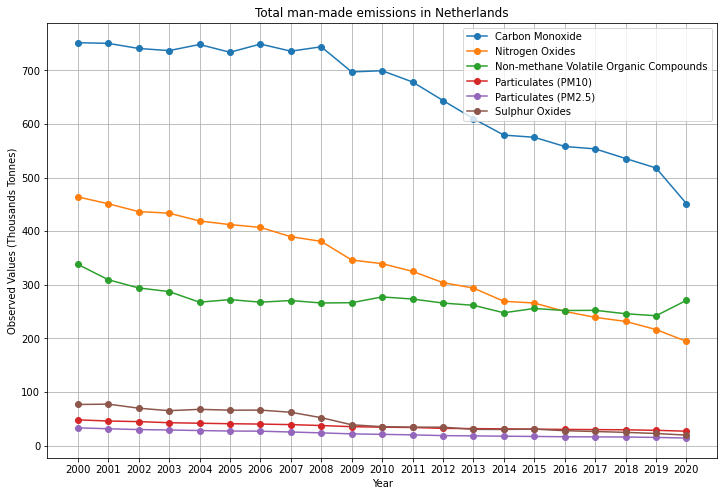

In [25]:
plot_pollutants('Netherlands')

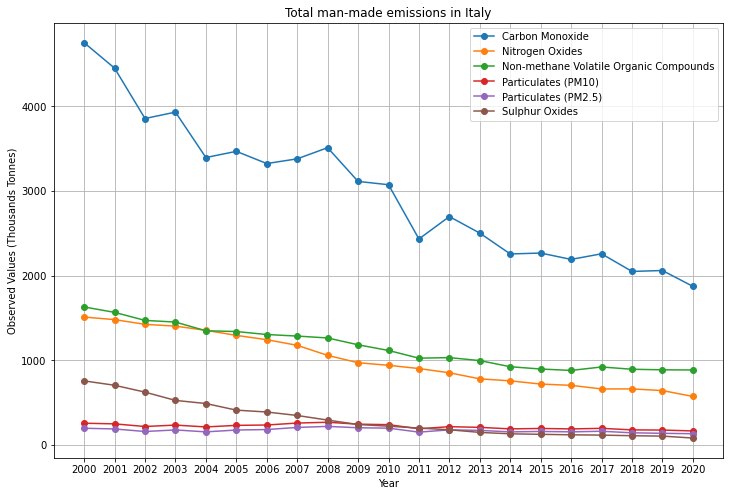

In [26]:
plot_pollutants('Italy')

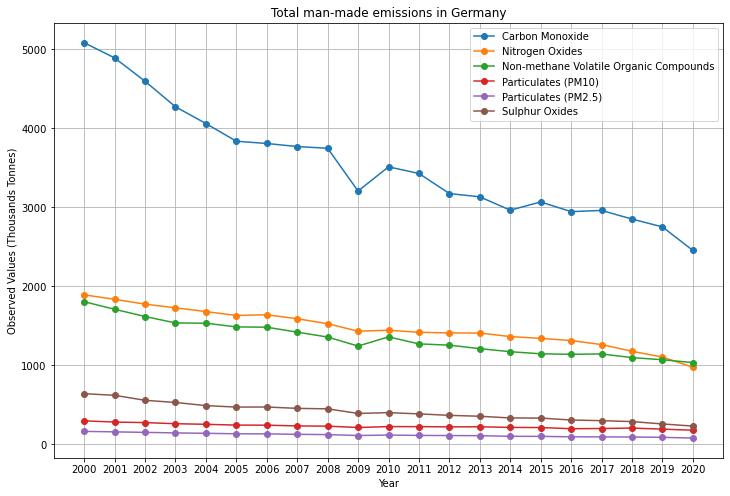

In [27]:
plot_pollutants('Germany')

These plots were used in our video to show that the emission of pollutants is slowly decreasing.

# Ethical considerations

The ethical considerations for this project are very clear cut. We found a public data set on OECD, which means there was nothing unethical about the process of finding the data. Furthermore, since it does not involve personal data, there were no privacy rules to consider. Additonally, the documentation of how the data was collected and what the vairables etc mean and how they cna be interpreted, can be found on the OECD website. The main thing we needed to be aware of was the bias in our data. There is no data for the entire continent of Africa  and barely any for South America and Asia- meaning our results as well as our analysis are very focused on western countries and thus western standards. This means even though we try to make conclusions about the whole of the earth - since climate change is a global issue- our conclusions are not entirely representative. For example, it was found that Australia hast the most droughts - this might not be true, since Africa is a generally very dry continent. In a future analysis, we should check for other data sets that could include these areas of earth.
In conclusion, there are certain aspects we need to be wary of in this data set and in our analysis, but we considered them and are interpreting our results accordingly.